In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = pd.read_csv('https://assets.datacamp.com/production/repositories/1497/datasets/62bd9feef451860db02d26553613a299721882e8/police.csv')

In [3]:
data.head()

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district
0,RI,2005-01-04,12:55,NaN,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4
1,RI,2005-01-23,23:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3
2,RI,2005-02-17,04:15,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4
3,RI,2005-02-20,17:15,NaN,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1
4,RI,2005-02-24,01:20,NaN,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   state               91741 non-null  object 
 1   stop_date           91741 non-null  object 
 2   stop_time           91741 non-null  object 
 3   county_name         0 non-null      float64
 4   driver_gender       86536 non-null  object 
 5   driver_race         86539 non-null  object 
 6   violation_raw       86539 non-null  object 
 7   violation           86539 non-null  object 
 8   search_conducted    91741 non-null  bool   
 9   search_type         3307 non-null   object 
 10  stop_outcome        86539 non-null  object 
 11  is_arrested         86539 non-null  object 
 12  stop_duration       86539 non-null  object 
 13  drugs_related_stop  91741 non-null  bool   
 14  district            91741 non-null  object 
dtypes: bool(2), float64(1), object(12)
memory usage: 9.3+

In [5]:
data.describe()

,county_name
count,0.0
mean,NaN
std,NaN
min,NaN
25%,NaN
50%,NaN
75%,NaN
max,NaN


## Data preprocessing

In [6]:
data.columns

Index(['state', 'stop_date', 'stop_time', 'county_name', 'driver_gender',
       'driver_race', 'violation_raw', 'violation', 'search_conducted',
       'search_type', 'stop_outcome', 'is_arrested', 'stop_duration',
       'drugs_related_stop', 'district'],
      dtype='object')

In [7]:
# check data type of 'county_name'
data['county_name'].dtype

dtype('float64')

In [8]:
data['county_name'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: county_name, dtype: float64

In [9]:
data['county_name'].unique()

# 'county_name' all values are missing

array([nan])

In [10]:
# check data type of 'search_conducted'
data['search_conducted'].dtype

dtype('bool')

In [11]:
data['search_conducted'].head()

0    False
1    False
2    False
3    False
4    False
Name: search_conducted, dtype: bool

In [12]:
data['search_conducted'].unique()

# contains true and false values only

array([False,  True])

In [13]:
# check data type of 'drugs_related_stop'
data['drugs_related_stop'].dtype

dtype('bool')

In [14]:
data['drugs_related_stop'].head()

0    False
1    False
2    False
3    False
4    False
Name: drugs_related_stop, dtype: bool

In [15]:
data['drugs_related_stop'].unique()

# contains true and false values only

array([False,  True])

In [16]:
# 'stop_date' and 'stop_time' are date time related values but are in string format

# check 'stop_date' values
print(data['stop_date'].unique())

# check 'stop_time' values
print(data['stop_time'].unique())

['2005-01-04' '2005-01-23' '2005-02-17' ... '2015-12-29' '2015-12-30'
 '2015-12-31']
['12:55' '23:15' '04:15' ... '05:22' '04:56' '05:38']


In [0]:
# concatenate date time data
combine_time = data['stop_date'].str.cat(data['stop_time'], sep=' ')

In [0]:
# create new dataframe for the combine date time data
data['combine_time'] = pd.to_datetime(combine_time)

In [19]:
# check for unessary duplicated values
duplicate = data.duplicated(subset=data.columns, keep=False)

data[duplicate]

,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,combine_time
47,RI,2005-10-01,22:40,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone K2,2005-10-01 22:40:00
48,RI,2005-10-01,22:40,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,16-30 Min,False,Zone K2,2005-10-01 22:40:00
202,RI,2005-10-08,09:25,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K2,2005-10-08 09:25:00
203,RI,2005-10-08,09:25,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K2,2005-10-08 09:25:00
213,RI,2005-10-08,12:20,NaN,F,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-10-08 12:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90629,RI,2015-11-06,07:30,NaN,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-11-06 07:30:00
90639,RI,2015-11-06,22:19,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X4,2015-11-06 22:19:00
90640,RI,2015-11-06,22:19,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,False,Zone X4,2015-11-06 22:19:00
91596,RI,2015-12-22,23:31,NaN,M,White,Registration Violation,Registration/plates,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-12-22 23:31:00


In [0]:
# drop duplicated data
data.drop_duplicates(subset=data.columns, keep=False, inplace=True)

In [21]:
# check if the duplicated data have been dropped
data[duplicate]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,state,stop_date,stop_time,county_name,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,combine_time


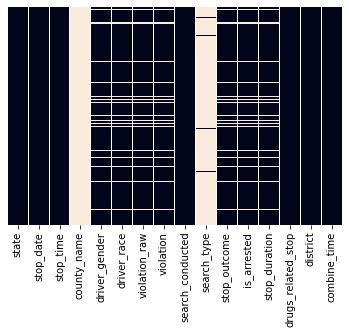

In [22]:
# check for missing data
sns.heatmap(data.isnull(),yticklabels=False,cbar=False)

In [23]:
data.isnull().mean().sort_values(ascending=False)*100

county_name           100.000000
search_type            96.379128
driver_gender           5.399894
stop_duration           5.396587
is_arrested             5.396587
stop_outcome            5.396587
violation               5.396587
violation_raw           5.396587
driver_race             5.396587
combine_time            0.000000
district                0.000000
drugs_related_stop      0.000000
search_conducted        0.000000
stop_time               0.000000
stop_date               0.000000
state                   0.000000
dtype: float64

In [0]:
# drop county_name
data.drop('county_name',axis=1,inplace=True)

In [25]:
# check search_type
data['search_type'].unique()

array([nan, 'Probable Cause', 'Incident to Arrest',
       'Incident to Arrest,Probable Cause', 'Protective Frisk',
       'Probable Cause,Protective Frisk,Reasonable Suspicion',
       'Reasonable Suspicion', 'Incident to Arrest,Protective Frisk',
       'Inventory,Protective Frisk', 'Inventory',
       'Inventory,Probable Cause', 'Incident to Arrest,Inventory',
       'Protective Frisk,Reasonable Suspicion',
       'Probable Cause,Reasonable Suspicion',
       'Incident to Arrest,Inventory,Protective Frisk',
       'Probable Cause,Protective Frisk',
       'Incident to Arrest,Probable Cause,Protective Frisk',
       'Incident to Arrest,Inventory,Probable Cause',
       'Incident to Arrest,Inventory,Reasonable Suspicion',
       'Incident to Arrest,Reasonable Suspicion',
       'Incident to Arrest,Protective Frisk,Reasonable Suspicion',
       'Inventory,Protective Frisk,Reasonable Suspicion',
       'Incident to Arrest,Probable Cause,Reasonable Suspicion',
       'Inventory,Probable 

In [26]:
data['search_type'].value_counts()

Incident to Arrest                                          1276
Probable Cause                                               920
Inventory                                                    219
Reasonable Suspicion                                         214
Protective Frisk                                             164
Incident to Arrest,Inventory                                 121
Incident to Arrest,Probable Cause                             98
Probable Cause,Reasonable Suspicion                           54
Probable Cause,Protective Frisk                               35
Incident to Arrest,Inventory,Probable Cause                   35
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      25
Protective Frisk,Reasonable Suspicion                         19
Incident to Arrest,Inventory,Protective Frisk                 18
Incident to Arrest,Probable Cause,Protective Frisk            13
Inventory,Protective Fris

In [27]:
data[data['search_type'].isnull()]

,state,stop_date,stop_time,driver_gender,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,district,combine_time
0,RI,2005-01-04,12:55,M,White,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-01-04 12:55:00
1,RI,2005-01-23,23:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2005-01-23 23:15:00
2,RI,2005-02-17,04:15,M,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X4,2005-02-17 04:15:00
3,RI,2005-02-20,17:15,M,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,Zone X1,2005-02-20 17:15:00
4,RI,2005-02-24,01:20,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone X3,2005-02-24 01:20:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91736,RI,2015-12-31,21:21,F,Black,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone K2,2015-12-31 21:21:00
91737,RI,2015-12-31,21:59,F,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,Zone K3,2015-12-31 21:59:00
91738,RI,2015-12-31,22:04,M,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,Zone X3,2015-12-31 22:04:00
91739,RI,2015-12-31,22:09,F,Hispanic,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,Zone K3,2015-12-31 22:09:00


In [0]:
# replace the missing values in 'search_type' to unknown
data = data.fillna({'search_type': 'Unknown'})

In [0]:
# given the remaining data missing only contains around 5% of the dataset, it can be drop
data.dropna(inplace=True)

In [0]:
# given that it's only one state, the 'state' column can be drop
data.drop('state', axis=1, inplace=True)

In [31]:
data.isnull().mean()

stop_date             0.0
stop_time             0.0
driver_gender         0.0
driver_race           0.0
violation_raw         0.0
violation             0.0
search_conducted      0.0
search_type           0.0
stop_outcome          0.0
is_arrested           0.0
stop_duration         0.0
drugs_related_stop    0.0
district              0.0
combine_time          0.0
dtype: float64

## EDA

Text(0.5, 1.0, 'Gender of Drivers')

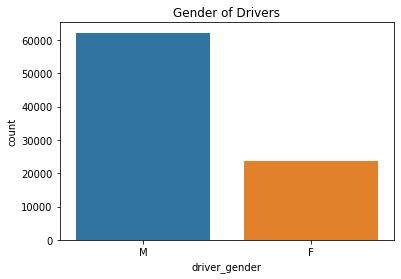

In [114]:
sns.countplot(data['driver_gender'])

plt.title('Gender of Drivers')

Text(0.5, 1.0, 'Race of Drivers')

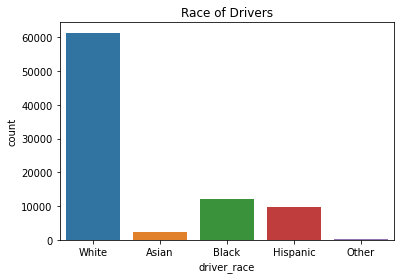

In [115]:
sns.countplot(data['driver_race'])

plt.title('Race of Drivers')

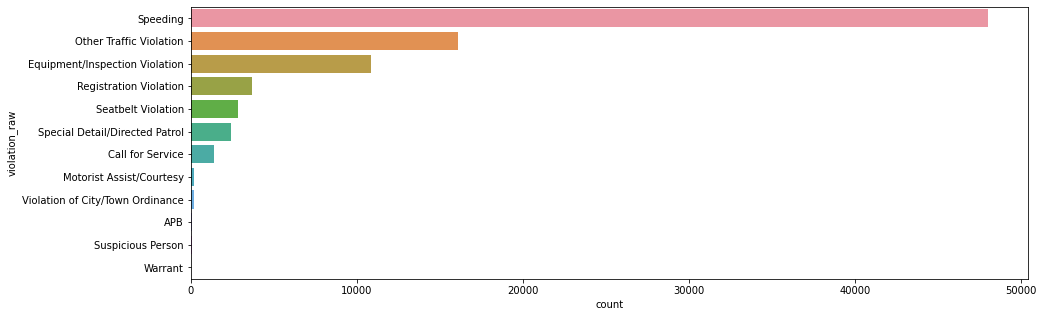

In [35]:
plt.figure(figsize=(15,5))

sns.countplot(y=data['violation_raw'],
              order=data['violation_raw'].value_counts().index)

Text(0.5, 1.0, 'Types of Violation')

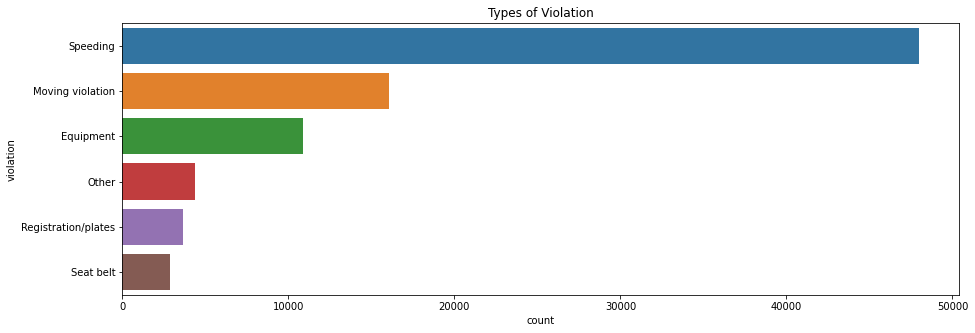

In [117]:
plt.figure(figsize=(15,5))

sns.countplot(y=data['violation'],
              order=data['violation'].value_counts().index)

plt.title('Types of Violation')

Text(0.5, 1.0, 'Types of Citation')

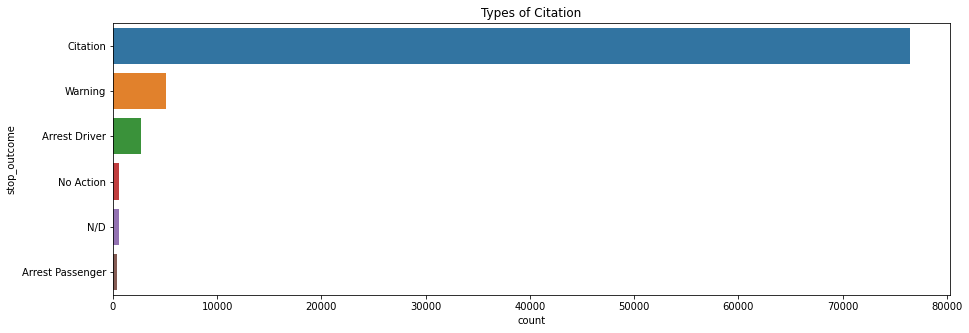

In [118]:
plt.figure(figsize=(15,5))

sns.countplot(y=data['stop_outcome'],
              order=data['stop_outcome'].value_counts().index)

plt.title('Types of Citation')

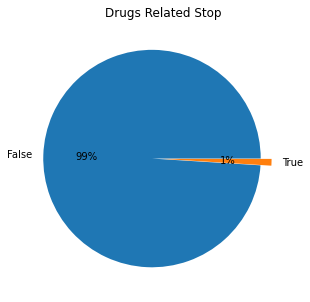

In [38]:
plt.figure(figsize=(15,5))

plt.pie(x = data['drugs_related_stop'].value_counts().values,
        explode = (0.1,0),
        autopct='%1.0f%%',
        labels = data['drugs_related_stop'].value_counts().index)

plt.title('Drugs Related Stop')

plt.show()

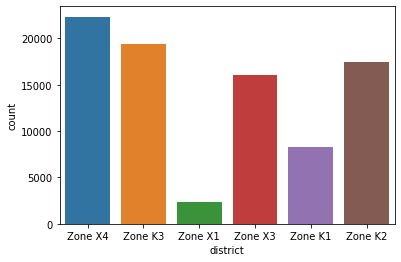

In [39]:
sns.countplot(data['district'])

#### Relationships

Text(0.5, 1.0, 'Driver gender and race')

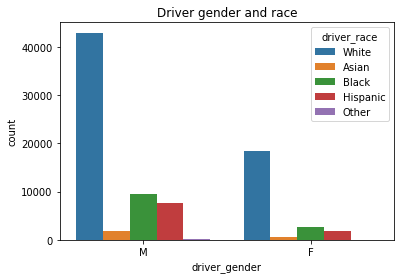

In [40]:
sns.countplot(x=data['driver_gender'], hue=data['driver_race'])

plt.title('Driver gender and race')

Text(0.5, 1.0, 'Search conducted based on the gender')

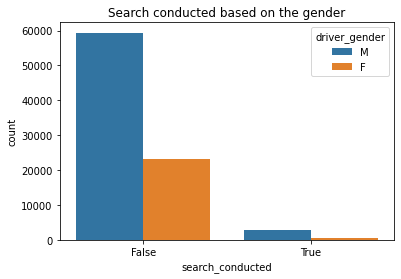

In [119]:
sns.countplot(x=data['search_conducted'], hue=data['driver_gender'])

plt.title('Search conducted based on the gender')

In [121]:
# search conducted based on the gender
data.groupby('driver_gender').search_conducted.sum()

driver_gender
F     454.0
M    2831.0
Name: search_conducted, dtype: float64

Text(0.5, 1.0, 'Violation based on gender')

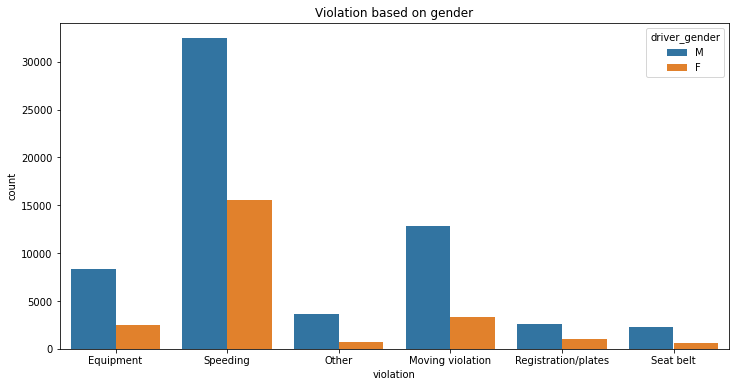

In [43]:
plt.figure(figsize=(12,6))

sns.countplot(data['violation'],hue=data['driver_gender'])

plt.title('Violation based on gender')

Text(0.5, 1.0, 'Violation based on race')

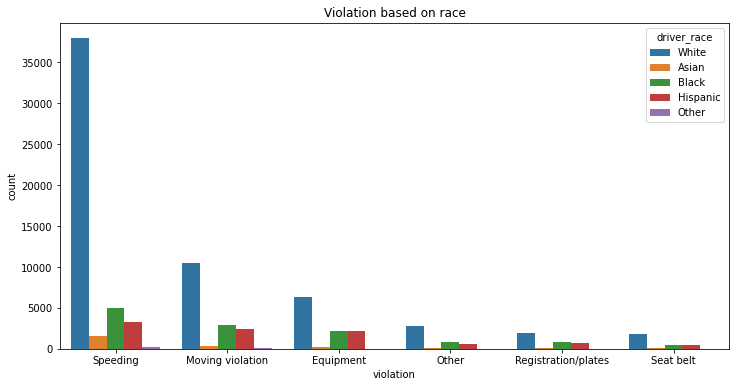

In [44]:
plt.figure(figsize=(12,6))

sns.countplot(data['violation'],hue=data['driver_race'],
              order=data['violation'].value_counts().index)

plt.title('Violation based on race')

Text(0.5, 1.0, 'Arrested by gender')

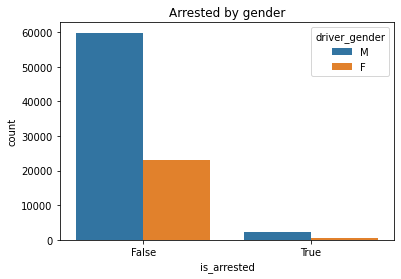

In [45]:
sns.countplot(data['is_arrested'],hue=data['driver_gender'])

plt.title('Arrested by gender')

Text(0.5, 1.0, 'Arrested by race')

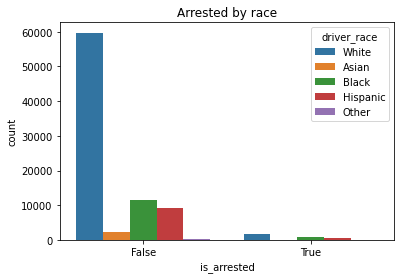

In [46]:
sns.countplot(data['is_arrested'],hue=data['driver_race'])

plt.title('Arrested by race')

In [47]:
# arreseted based on race
data.groupby('driver_race')['is_arrested'].sum()

driver_race
Asian         42
Black        753
Hispanic     597
Other          2
White       1616
Name: is_arrested, dtype: int64

AttributeError: ignored

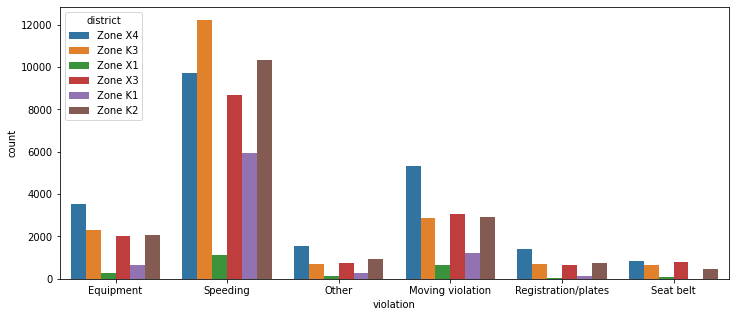

In [122]:
plt.figure(figsize=(12,5))

sns.countplot(data['violation'],hue=data['district'])

plt.tile('Types of violation based on district')

Text(0.5, 1.0, 'Types of violation based on the stop duration')

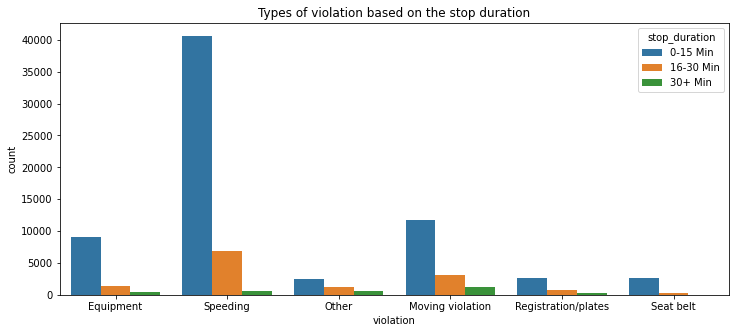

In [123]:
plt.figure(figsize=(12,5))

sns.countplot(data['violation'],hue=data['stop_duration'])

plt.title('Types of violation based on the stop duration')

Since speeding is the most being violated based on gender and race, the focus will be on that

In [0]:
# create a dataframe for males that were stopped by speeding
male_speeding = data[(data['driver_gender']=='M') &(data['violation']=='Speeding')]

# create a dataframe for females that were stopped by speeding
female_speeding = data[(data['driver_gender']=='F') &(data['violation']=='Speeding')]

In [51]:
# stop outcome for male speeding
male_speeding['stop_outcome'].value_counts(normalize='True')

Citation            0.945035
Warning             0.036243
Arrest Driver       0.015366
Arrest Passenger    0.001293
No Action           0.001078
N/D                 0.000985
Name: stop_outcome, dtype: float64

In [52]:
# stop outcome for female speeding
female_speeding['stop_outcome'].value_counts(normalize='True')

Citation            0.952761
Warning             0.039709
Arrest Driver       0.005535
N/D                 0.000965
Arrest Passenger    0.000644
No Action           0.000386
Name: stop_outcome, dtype: float64

In [53]:
# were male arrested?
male_speeding.groupby(['stop_outcome'])['is_arrested'].sum()

stop_outcome
Arrest Driver       499
Arrest Passenger     42
Citation              0
N/D                   0
No Action             0
Warning               0
Name: is_arrested, dtype: int64

In [54]:
# were female arrested?
female_speeding.groupby(['stop_outcome'])['is_arrested'].sum()

stop_outcome
Arrest Driver       86
Arrest Passenger    10
Citation             0
N/D                  0
No Action            0
Warning              0
Name: is_arrested, dtype: int64

In [55]:
# district where male speeding are conducted
male_speeding.groupby('district')['search_conducted'].sum()

district
Zone K1     95.0
Zone K2    154.0
Zone K3    336.0
Zone X1      7.0
Zone X3     89.0
Zone X4    221.0
Name: search_conducted, dtype: float64

In [56]:
# district where female speeding are conducted
female_speeding.groupby('district')['search_conducted'].sum()

district
Zone K1    23.0
Zone K2    24.0
Zone K3    53.0
Zone X1     0.0
Zone X3     7.0
Zone X4    21.0
Name: search_conducted, dtype: float64

In [57]:
# districts where stop are due to drug related
data.groupby('drugs_related_stop')['district'].value_counts()

drugs_related_stop  district
False               Zone X4     22018
                    Zone K3     19156
                    Zone K2     17358
                    Zone X3     15954
                    Zone K1      8159
                    Zone X1      2326
True                Zone X4       325
                    Zone K3       253
                    Zone K2       112
                    Zone X3        82
                    Zone K1        77
                    Zone X1         5
Name: district, dtype: int64

In [58]:
# districts where male speeding where stop due to drug related
male_speeding.groupby('drugs_related_stop')['district'].value_counts()

drugs_related_stop  district
False               Zone K3     8433
                    Zone K2     6786
                    Zone X4     6731
                    Zone X3     5645
                    Zone K1     3876
                    Zone X1      751
True                Zone K3      102
                    Zone X4       61
                    Zone K2       41
                    Zone K1       31
                    Zone X3       18
Name: district, dtype: int64

In [59]:
# districts where female speeding where stop due to drug related
female_speeding.groupby('drugs_related_stop')['district'].value_counts()

drugs_related_stop  district
False               Zone K3     3678
                    Zone K2     3493
                    Zone X3     3041
                    Zone X4     2920
                    Zone K1     2011
                    Zone X1      364
True                Zone K3       16
                    Zone K2        7
                    Zone K1        4
                    Zone X4        3
                    Zone X3        1
Name: district, dtype: int64

#### Time series

In [0]:
# create a 'date' column from the 'combine_time' column
data['date'] = data['combine_time'].apply(lambda x: x.date())

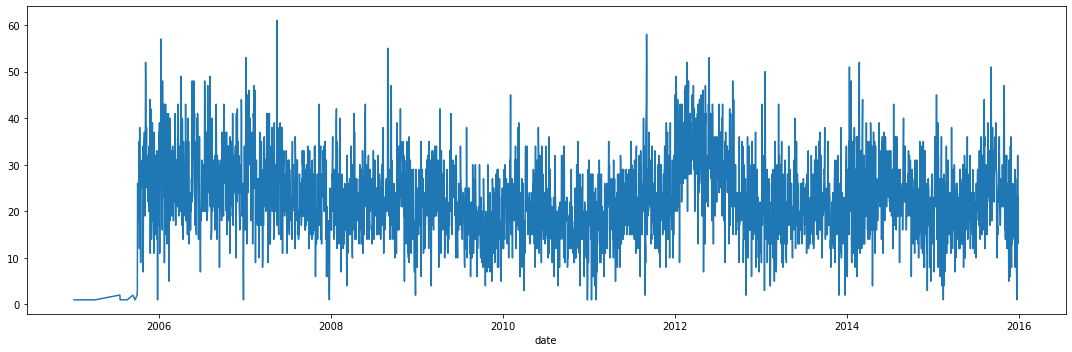

In [103]:
# rate of stop conducted by date
plt.figure(figsize=(15,5))

data.groupby('date').count()['search_conducted'].plot()

plt.tight_layout()

In [104]:
# mean stopped 
data.groupby('date').count().mean().values[0]

22.862280234416623

In [0]:
# create 'day' column from the 'combine_time' column
data['day'] = data['combine_time'].apply(lambda x: x.dayofweek)

# map the values given to day of week
data['day'] = data['day'].map({0:'Mon', 1:'Tue', 2:'Wed', 3:'Thur', 4:'Fri', 5:'Sat', 6:'Sun'})

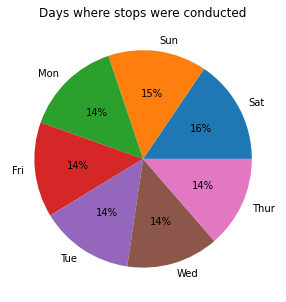

In [63]:
# rate of stop conduted by day
plt.figure(figsize=(15,5))

plt.pie(x = data['day'].value_counts().values,
        autopct='%1.0f%%',
        labels = data['day'].value_counts().index)

plt.title('Days where stops were conducted')

plt.show()

The frequency of stops are almost identical every day

In [0]:
# create a 'month' column from the 'combine_time' column
data['month'] = data['combine_time'].apply(lambda x: x.month)

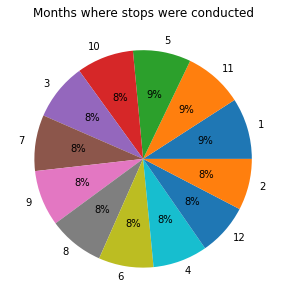

In [69]:
# rate of stop conducted by month
plt.figure(figsize=(15,5))

plt.pie(x = data['month'].value_counts().values,
        autopct='%1.0f%%',
        labels = data['month'].value_counts().index)

plt.title('Months where stops were conducted')

plt.show()

The same can be said on the frequency of stops based on the months

In [0]:
# create a 'hour' column from the 'combine_time' column
data['hour'] = data['combine_time'].apply(lambda x: x.hour)

Text(0.5, 1.0, 'Rate of stops conducted by the hour')

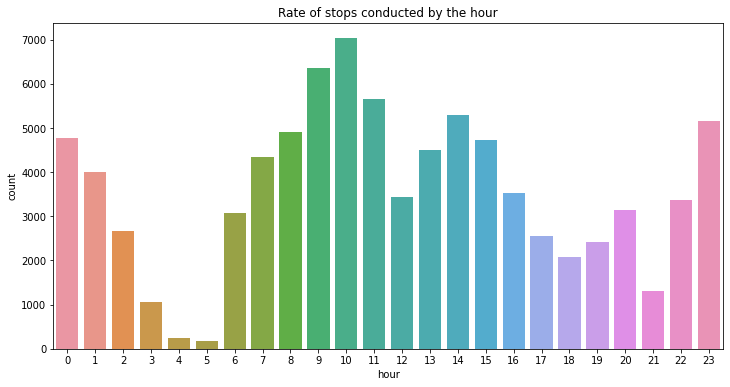

In [75]:
# rate of stop conducted by hour
plt.figure(figsize=(12,6))

sns.countplot(data['hour'])

plt.title('Rate of stops conducted by the hour')

The highest hour of stops conducted is around the 10th hour of the day, while the lowest is at the 5th hour of the day.